<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/03_introduction_to_commputer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Net works and Computer Vision with TensoFlow

Computer vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front. 

## Get the data
The images we're working with are form the Food1-1 dataset(101 different classes of food)

However we've modified it to only use two classes(pizza and steak)

**Note:** We start with a smaller datatset so we can experiment quickly and figure what works or better yet what doesn't work before scaling up. 

In [1]:
import zipfile


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-08-23 06:18:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.71.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.71.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  51.0MB/s    in 2.1s    

2021-08-23 06:18:33 (51.0 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for a computer vision project.... It usually means visualizing many samples of your data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
import os 

# Walk through puiizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:

# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 23 06:18 .
drwxr-xr-x 1 root root 4096 Aug 23 06:18 ..
-rw-r--r-- 1 root root 6148 Aug 23 06:18 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 23 06:18 test
drwxr-xr-x 4 root root 4096 Aug 23 06:18 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [8]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectory
class_names = class_names[1:] # Remove .DS_store
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): 
  # Set up the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['576236.jpg']
Image shape: (512, 512, 3)


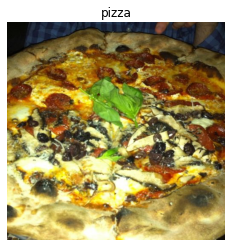

In [10]:
# View a random image from the trainig dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[250, 170,  13],
        [246, 166,   9],
        [245, 165,   8],
        ...,
        [246, 168,   8],
        [243, 167,   6],
        [245, 169,   8]],

       [[251, 171,  14],
        [246, 166,   9],
        [246, 163,   7],
        ...,
        [247, 167,   8],
        [242, 164,   4],
        [243, 165,   5]],

       [[253, 170,  12],
        [248, 165,   9],
        [246, 163,   7],
        ...,
        [244, 162,   1],
        [247, 165,   4],
        [254, 172,  11]],

       ...,

       [[248,  85,  10],
        [244,  81,   6],
        [246,  83,   6],
        ...,
        [246, 102,   6],
        [249, 105,   9],
        [250, 107,  11]],

       [[245,  82,   7],
        [247,  84,   9],
        [244,  81,   6],
        ...,
        [241, 103,   4],
        [241, 103,   4],
        [245, 107,   6]],

       [[250,  86,  14],
        [254,  91,  16],
        [246,  83,   8],
        ...,
        [243, 107,   

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discuessed beffore , many machine learning models, including neural networks prefer the values they work with to be between 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).


In [ ]:
# get all the pixel values between 0 & 1
img/255.

array([[[0.98039216, 0.66666667, 0.05098039],
        [0.96470588, 0.65098039, 0.03529412],
        [0.96078431, 0.64705882, 0.03137255],
        ...,
        [0.96470588, 0.65882353, 0.03137255],
        [0.95294118, 0.65490196, 0.02352941],
        [0.96078431, 0.6627451 , 0.03137255]],

       [[0.98431373, 0.67058824, 0.05490196],
        [0.96470588, 0.65098039, 0.03529412],
        [0.96470588, 0.63921569, 0.02745098],
        ...,
        [0.96862745, 0.65490196, 0.03137255],
        [0.94901961, 0.64313725, 0.01568627],
        [0.95294118, 0.64705882, 0.01960784]],

       [[0.99215686, 0.66666667, 0.04705882],
        [0.97254902, 0.64705882, 0.03529412],
        [0.96470588, 0.63921569, 0.02745098],
        ...,
        [0.95686275, 0.63529412, 0.00392157],
        [0.96862745, 0.64705882, 0.01568627],
        [0.99607843, 0.6745098 , 0.04313725]],

       ...,

       [[0.97254902, 0.33333333, 0.03921569],
        [0.95686275, 0.31764706, 0.02352941],
        [0.96470588, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to ur training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data ( get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Build a CNN model(same as the Tiny VGG on the CNN explainer website)

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, 
                         activation=tf.keras.activations.relu,
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 42s 210ms/step - loss: 0.5198 - accuracy: 0.7380 - val_loss: 0.3857 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4150 - accuracy: 0.8253 - val_loss: 0.3306 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3911 - accuracy: 0.8313 - val_loss: 0.3525 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3646 - accuracy: 0.8380 - val_loss: 0.3239 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3243 - accuracy: 0.8673 - val_loss: 0.3083 - val_accuracy: 0.8740


**Note:** If the above cell is taking longer than ~ 10 seconds per epoch, make sure you're using a GPU by going to 

Runtime -> Change Runtime Type -> Hardware Accelator  -> GPU(you may have to rerun some sells above)


In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# poloclub.github.io/cnn-explainer

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our imaghe data.

The model we're building is from the TensorFlow playground:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6927 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


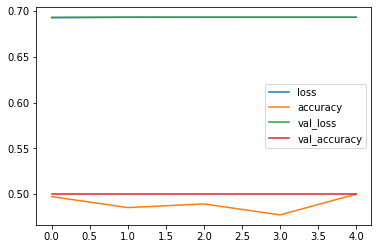

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot()

In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN, model_2 performs terribly... let's try to improve

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model(same as above but let's step it up a notch)
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 2.8814 - accuracy: 0.6280 - val_loss: 0.7632 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8753 - accuracy: 0.7233 - val_loss: 0.6497 - val_accuracy: 0.7100
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6860 - accuracy: 0.7300 - val_loss: 0.5038 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7257 - accuracy: 0.7467 - val_loss: 0.5925 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.5637 - accuracy: 0.7680 - val_loss: 0.5896 - val_accuracy: 0.7260


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)

2. Preprocess the data (prepared it for our model, the main step here was scaling/ normalizing)

3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline) 
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2890573.jpg']
Image shape: (512, 512, 3)
['3102271.jpg']
Image shape: (512, 512, 3)


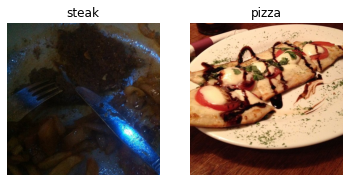

In [ ]:
# Visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~ 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying t olearn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health....

In [12]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [13]:

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to laod data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:

# Get a sample of a train data batch 
images, labels = train_data.next() # get the "next " batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [15]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.38823533, 0.37647063, 0.3019608 ],
          [0.34509805, 0.33333334, 0.26666668],
          [0.27450982, 0.26666668, 0.21568629],
          ...,
          [0.43137258, 0.37254903, 0.2509804 ],
          [0.427451  , 0.36862746, 0.24705884],
          [0.427451  , 0.36862746, 0.24705884]],
 
         [[0.39607847, 0.38823533, 0.30588236],
          [0.34901962, 0.3372549 , 0.27058825],
          [0.28235295, 0.27450982, 0.22352943],
          ...,
          [0.43137258, 0.37254903, 0.2509804 ],
          [0.43137258, 0.37254903, 0.2509804 ],
          [0.43137258, 0.37254903, 0.2509804 ]],
 
         [[0.40784317, 0.38823533, 0.30980393],
          [0.3529412 , 0.34117648, 0.27450982],
          [0.28235295, 0.27450982, 0.22352943],
          ...,
          [0.43137258, 0.37254903, 0.2509804 ],
          [0.43529415, 0.37647063, 0.25490198],
          [0.43529415, 0.37647063, 0.25490198]],
 
         ...,
 
         [[0.02352941, 0.00784314, 0.01176471],
          [0.02745

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup
when beginning a machine learning experiment and then as you keep experimenting,
you try to beat the baseline

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of you problem)

In [47]:
# Make the creatin of our model a lirttel easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential


In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=3, # the size of the sliding window going across an input 
         strides=1, # the size of the step the sliding window takes across an input
         padding="valid", # if "same" output shape is same as input shape, if "valid", output shape gets compressed 
         activation="relu",
         input_shape=(224, 224, 3)), # Input layer (Specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # It's a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 1.3199 - accuracy: 0.6080 - val_loss: 0.5664 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5056 - accuracy: 0.7733 - val_loss: 0.4607 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3175 - accuracy: 0.8787 - val_loss: 0.4559 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.1738 - accuracy: 0.9513 - val_loss: 0.5446 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.0655 - accuracy: 0.9853 - val_loss: 0.5396 - val_accuracy: 0.7700


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it

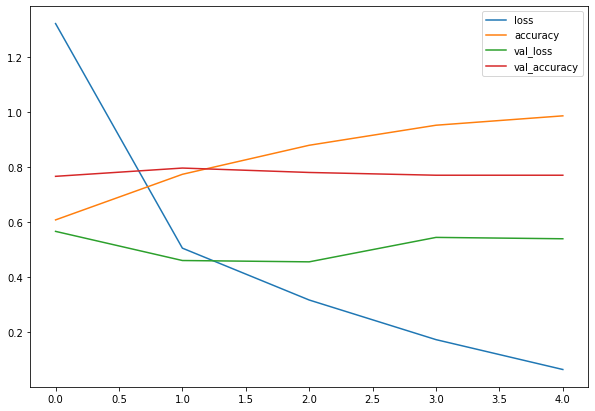

In [ ]:
# Let's plot the traing curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [54]:
# Plot the validation and trainuing curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation matrix
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *to well* and thus the model's ability to generalize to unseen data will be diminished.


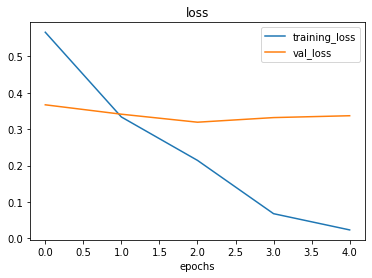

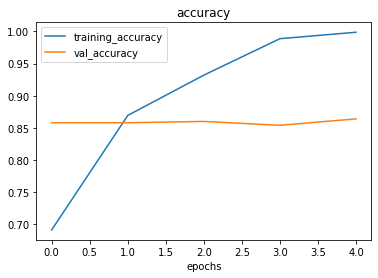

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baselime by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer


Reduce overfitting:

* Add data augementation
* Add regularization layers (such as MaxPool2D)
* Add more data

**Note:** Reducing overfitting is also known as *regularization*



In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=(test_data),
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5846 - accuracy: 0.6940 - val_loss: 0.5174 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4727 - accuracy: 0.7847 - val_loss: 0.3819 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.3979 - accuracy: 0.8193 - val_loss: 0.3174 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3698 - accuracy: 0.8347 - val_loss: 0.3113 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3520 - accuracy: 0.8507 - val_loss: 0.2942 - val_accuracy: 0.8680


In [ ]:
# Get the summary of our model with max pooling
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

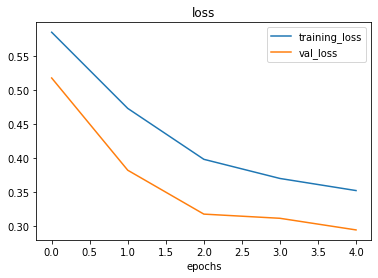

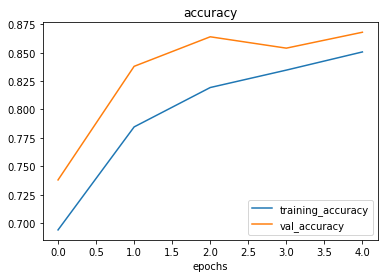

In [ ]:
# plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [39]:
# Create ImageDataGenerator training instacnce with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
# Create ImageDataGenerator withour data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model  to learn more 
generalizable (hopefully) patterns.

Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [40]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose only

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)


# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                          target_size=(224, 224),
                                          batch_size=32,
                                          class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're load into the model.

Finally... let's visualize some augmented data

In [41]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented, only data

Showing image number : 24


(-0.5, 223.5, 223.5, -0.5)

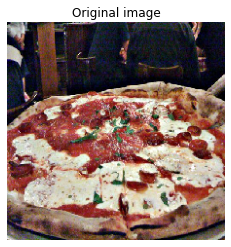

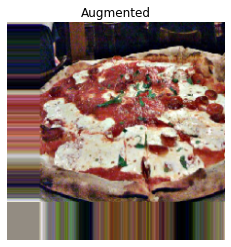

In [46]:
# Show origimal image and augmented image
import random
random_number = random.randint(0, 32)
print(f"Showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented")
plt.axis(False)

> Data augmentation is looking at the same data but from different perspective

Cropping, replacing, shearing,...

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [58]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=(test_data),
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 547ms/step - loss: 0.7169 - accuracy: 0.5093 - val_loss: 0.6835 - val_accuracy: 0.5660
Epoch 2/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6883 - accuracy: 0.5760 - val_loss: 0.6669 - val_accuracy: 0.6720
Epoch 3/5
47/47 [==============================] - 25s 542ms/step - loss: 0.6767 - accuracy: 0.6087 - val_loss: 0.5856 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.8639 - accuracy: 0.5860 - val_loss: 0.6510 - val_accuracy: 0.6120
Epoch 5/5
47/47 [==============================] - 25s 541ms/step - loss: 0.6928 - accuracy: 0.5107 - val_loss: 0.6850 - val_accuracy: 0.6060


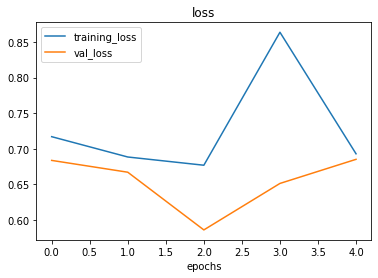

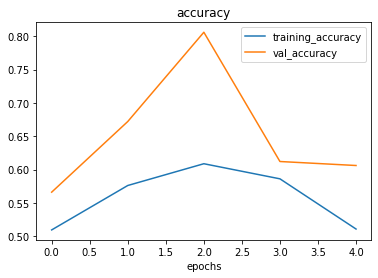

In [59]:
# Check our model training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [60]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [62]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6301 - accuracy: 0.6253 - val_loss: 0.6138 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5124 - accuracy: 0.7520 - val_loss: 0.3667 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.4776 - accuracy: 0.7860 - val_loss: 0.4055 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 25s 540ms/step - loss: 0.4786 - accuracy: 0.7860 - val_loss: 0.3374 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 25s 538ms/step - loss: 0.4554 - accuracy: 0.8007 - val_loss: 0.3376 - val_accuracy: 0.8520


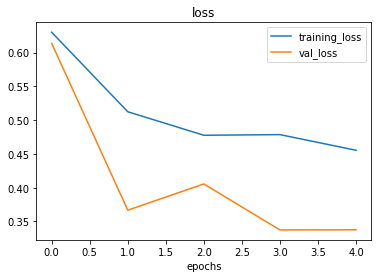

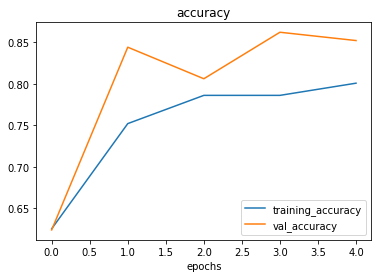

In [64]:
# Plot loss curves
plot_loss_curves(history_7)

> When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layeres)
* Increase the number of filters in each convolutional layers (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunitites to learn)
* Use transfer learning to leverage what another image model has learn and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data

In [65]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


In [68]:
# View our example image
import matplotlib.image as mpimg 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2021-08-23 07:53:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2021-08-23 07:53:35 (69.2 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

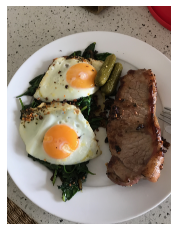

In [70]:
plt.imshow(steak)
plt.axis(False)

In [71]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [72]:
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

> **Note**: When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom (or new data) is preprocessed into the same format as the data your model was trained on.

In [73]:
# Create function to import the image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, color_channels)
  """
  # Read in nthe image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all value between 0 and 1)
  img = img/255.
  return img

In [75]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg',224)

In [76]:
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [82]:
# Make a prediction
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it currently ot=utputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction ?

In [81]:
# Remind ourselves of our class name
class_names

array(['pizza', 'steak'], dtype='<U9')

In [84]:
# We can index the predicted by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [86]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import image located at filename , makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the preidcted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

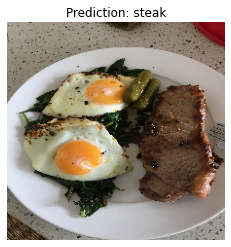

In [87]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image ... this time pizza

--2021-08-23 08:17:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2021-08-23 08:17:51 (84.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



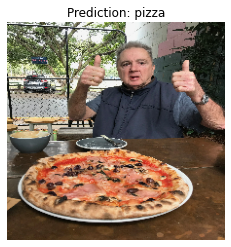

In [88]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")